# Goal:
Predict the cuisine based on an input of a list of ingredients

In [1]:
import pandas as pd #Data manipulation
import numpy as np #Array and Matrix operations
import matplotlib.pyplot as plt #Plotting
import seaborn as sb #Plotting
sb.set()

# Dataset Preparation
The following steps are taken to prepare the data for EDA as well as model training:
1. The `id` column is set as the index
2. The Dataframe is sorted based on the `id` column
`Note:` We use the modified training set which we got from `Exploratory Analysis.ipynb`

In [2]:
data = pd.read_csv("data/modified_train.csv")
data = data.set_index("id")
data = data.sort_values("id")
data.head()

,cuisine,ingredients,all_ingredients
id,,,
0,spanish,"['mussels', 'ground black pepper', 'garlic clo...",mussels;ground black pepper;garlic cloves;saff...
1,mexican,"['tomatoes', 'diced red onions', 'paprika', 's...",tomatoes;diced red onions;paprika;salt;corn to...
2,french,"['chicken broth', 'truffles', 'pimentos', 'gre...",chicken broth;truffles;pimentos;green pepper;o...
3,chinese,"['fresh ginger', 'sesame oil', 'frozen peas', ...",fresh ginger;sesame oil;frozen peas;cooked ric...
4,italian,"['orange peel', 'cookies', 'vanilla ice cream'...",orange peel;cookies;vanilla ice cream;gran mar...


# Count Vectorizer
Machine learning models can only take in numbers. Therefore, we need to convert our unordered textual data into a numerical form. For this, we use a Count Vectorizer.

A Count Vectorizer takes text input and makes a column for each unique word. For each row (in this case, a dish), it puts a 1 in the ingredient columns which are present in the recipe and a 0 under the columns which aren't. This is essentially a one-hot-encoding technique.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(data['all_ingredients'].values)
X.shape

(39774, 3051)

# Label Encoder
We need to encode the cuisine names into numbers for the machine learning algorithm. We do this with Label Encoder.

Label Encoder essentially changes cuisine names to unique numbers.

In [16]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(data.cuisine)

In [17]:
#Checking the cuisines of some dishes
y[:100]

array([17, 13,  5,  3,  9,  3,  5, 16,  3,  9, 13,  7, 13,  9, 18, 13, 16,
       13, 13,  2, 10, 13, 11, 13,  6, 13, 16, 13, 15, 13,  5,  8, 16,  7,
        7, 16,  7,  2, 18, 13,  9, 17, 13, 13, 18,  9, 14,  2,  9,  8, 11,
       17,  9,  5,  9,  3,  7, 13,  9, 13, 12, 16,  9,  7, 16,  6, 14,  4,
       16, 13, 16,  6, 10, 15,  5, 16,  9,  9, 11, 13, 13,  5,  4, 16,  3,
        5,  3, 19, 16, 12, 17, 13, 16,  9, 13,  5,  5, 13,  9,  9])

In [18]:
#LabelEncoder converts strings to numbers
enc.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

# Train-Test Split
We split the model in an 80-20 ratio as the training and cross-validation set.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Logistic Regression
Logistic Regression is a classification model. It involves fitting an S-shaped curve between 2 classes:
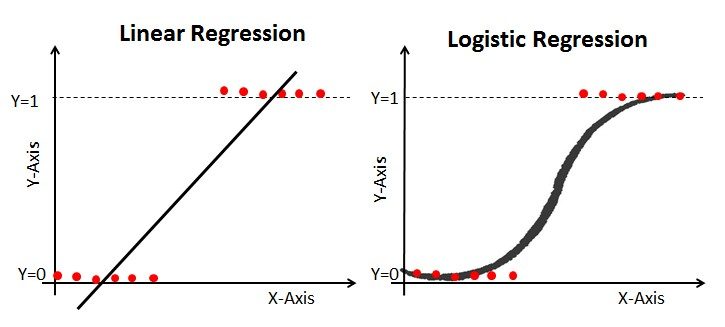

The model outputs a probability of Y based on the feature X. 

In [20]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
logistic.score(X_test, y_test)

0.7875549968573224

The logistic regression model outputs cuisines with a probability of `78.4%`

# Confusion Matrix
We use a confusion matrix to see which cuisines are predicted accurately and which aren't. The row represent `True Values` while the columns represent `Predicted Values`. The colour of the intersecting boxes shows which cuisines are most accurately predicted.

Text(0.5, 62.474999999999966, 'Predicted label')

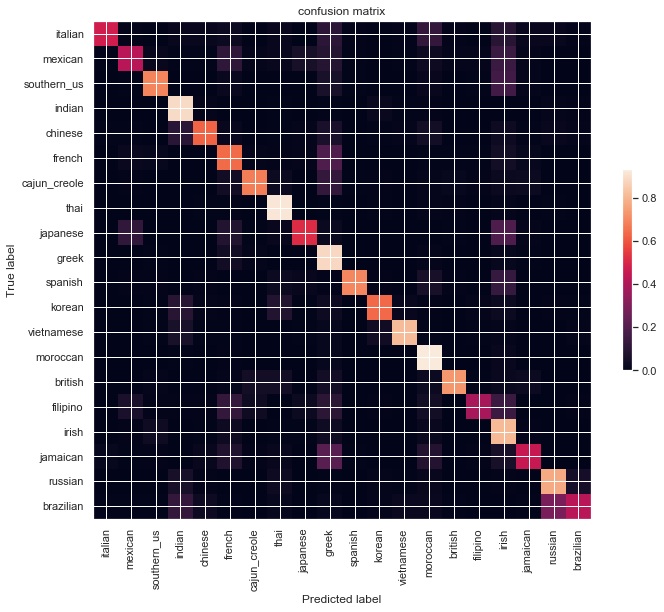

In [22]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = data['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

As we can see, some cuisines such as Moroccan, Thai and Indian are really well predicted. We also see that Greek is sometimes misidentified as other cuisines.  
___

# Classification Report
We can also see the numerical representation of the above graph

In [24]:
from sklearn.metrics import classification_report

y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.80      0.48      0.60       100
     mexican       0.52      0.42      0.47       151
 southern_us       0.77      0.69      0.73       311
      indian       0.82      0.89      0.85       572
     chinese       0.71      0.63      0.66       145
      french       0.59      0.64      0.62       476
cajun_creole       0.78      0.68      0.73       249
        thai       0.86      0.92      0.89       587
    japanese       0.68      0.52      0.59       139
       greek       0.81      0.89      0.85      1580
     spanish       0.84      0.70      0.76       103
      korean       0.82      0.64      0.72       283
  vietnamese       0.88      0.82      0.85       170
    moroccan       0.89      0.93      0.91      1279
     british       0.84      0.73      0.78       160
    filipino       0.63      0.38      0.48       102
       irish       0.73      0.81      0.77       869
    jamaican       0.62    

We now create a function which takes in an array of ingredients and returns a cuisine using the Logistic Regression model.

In [25]:
def predict_cuisine(ingredients):
    X_test = cv.transform(ingredients.values)
    result = logistic.predict(X_test)
    result = enc.inverse_transform(result)
    print(result)

#### `Examples:` Below are some example outputs of this function

In [27]:
predict_cuisine(pd.Series(["naan; chickpeas"]))

['indian']


In [28]:
predict_cuisine(pd.Series(["sesame oil; mirin"]))

['japanese']


In [29]:
predict_cuisine(pd.Series(["cheese; beans"]))

['mexican']


In [30]:
predict_cuisine(pd.Series(["spaghetti"]))

['italian']


# Exporting models to run on Flask
We will export the Count Vectorizer and the Logistic Regression model so it can be run on Flask

In [32]:
from sklearn.externals import joblib
joblib.dump(cv, 'cuisine_count_vectorizer.pkl', compress=9)
joblib.dump(logistic, 'cuisine_logistic_model.pkl', compress=9)
joblib.dump(enc, 'cuisine_label_encoder.pkl', compress=9)

['cuisine_label_encoder.pkl']